In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Text(0.5, 1.0, 'Probability Density Funciton (pdf)')

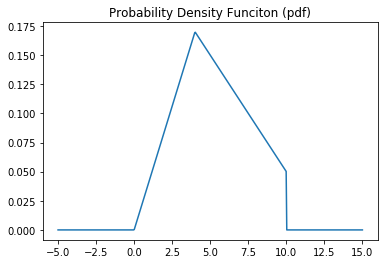

In [3]:
# self defined pdf function
def self_pdf(x):
    if x <= 0 or x >= 10:
        return 0
    if x <= 4:
        return 0.17 * x / 4
    if x >= 4:
        return - 0.02 * x + 0.25

x_list = np.linspace(-5,15,500)
plt.plot(x_list, [self_pdf(x) for x in x_list])
plt.title('Probability Density Funciton (pdf)')

Text(0.5, 1.0, 'Cumulative Density Funciton (cdf)')

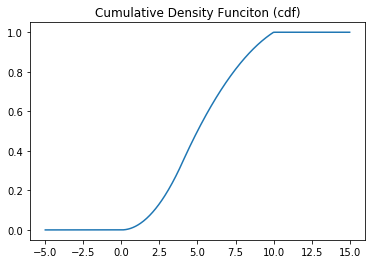

In [4]:
def self_cdf(x):
    if x <= 0:
        return 0
    if x >= 10:
        return 1
    if x <= 4:
        return 0.17 / 8 * x ** 2
    if x >= 4:
        return - 0.01 * x ** 2 + 0.25 * x - 0.5

x_list = np.linspace(-5,15,500)
plt.plot(x_list, [self_cdf(x) for x in x_list])
plt.title('Cumulative Density Funciton (cdf)')

Text(0.5, 1.0, 'Inverse cdf')

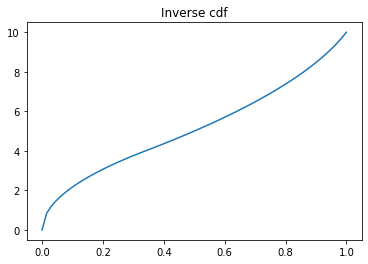

In [10]:
def self_inverse_cdf(x):
    if x <= 0:
        return 0
    if x <= 0.34:
        return math.sqrt(8 * x / 0.17)
    if x <= 1:
        return (-0.25 + math.sqrt(0.25 ** 2 - 4 * (-0.01) * (-0.5 - x)))/(2 * (-0.01))
    if x >= 1:
        return math.inf

x_list = np.linspace(0,1.5,100)
plt.plot(x_list, [self_inverse_cdf(x) for x in x_list])
plt.title('Inverse cdf')
#x_list

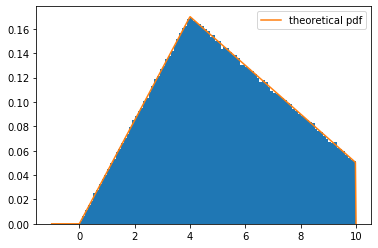

In [12]:
size = 1000000

U = np.random.uniform(size=size)

"""
#primitive python iteration loop method
rv_list = np.zeros(size)
for i in range(size):
    rv_list[i] = self_inverse_cdf(U[i])

_ = plt.hist(rv_list, bins=100, density=True)
x_list = np.linspace(-1,10,500)
plt.plot(x_list, [self_pdf(x) for x in x_list], label='theoretical pdf')
plt.legend()
"""
#np.vectorize method (more efficient)
vectorize_inverse_cdf = np.vectorize(self_inverse_cdf) #self_inverse_cdf can now take array input
_ = plt.hist(vectorize_inverse_cdf(U), bins=100, density=True)

x_list = np.linspace(-1,10,500)
plt.plot(x_list, [self_pdf(x) for x in x_list], label='theoretical pdf')
plt.legend()